In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import statistics

# $2$分探索法（binary search）

## 以下$2$分探索を行う関数

In [2]:
def binary_search(df, target):
    low = 0
    high = len(df) -1
    start = time.time()
    while low <= high:
        median = (low + high) // 2
        if df[median][0] == target:
            return median, time.time()-start
        elif df[median][0] > target:
            high = median - 1
        else:
            low = median + 1
    return None, time.time()-start

## 試しに適当な数で実験

In [3]:
num  = 10
figure1 = 0
figure2 = 1

In [4]:
df = pd.DataFrame()
for i in range(num):
    df.loc[i, 0]  = figure2
    figure1, figure2 = figure2, figure1 + figure2

In [5]:
df

,0
0,1.0
1,1.0
2,2.0
3,3.0
4,5.0
5,8.0
6,13.0
7,21.0
8,34.0
9,55.0


In [6]:
df = df.values.tolist()
print(df)

[[1.0], [1.0], [2.0], [3.0], [5.0], [8.0], [13.0], [21.0], [34.0], [55.0]]


出力
- $1$つめが何列目にあるかという情報
- $2$つ目が探索にかかった時間

In [7]:
target = 34
print(binary_search(df, target))

(8, 2.86102294921875e-06)


##  リストの数を変えて実験

### $2$分探索法を使用した場合

In [8]:
all_time_list = []

num  = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
count = 10

for i in range(len(num)):
    time_list = []
    figure1 = 0
    figure2 = 1
    df = pd.DataFrame()

    for j in range(num[i]):
        df.loc[j, 0]  = figure2
        figure1, figure2 = figure2, figure1 + figure2

    df = df.values.tolist()

    for _ in range(count):
        
        t = binary_search(df, random.choice(df)[0])[1]
        time_list.append(t)
    all_time_list.append(time_list)

In [9]:
mean_list_binary_search = []
for i in range(len(all_time_list)):
    mean = statistics.mean(all_time_list[i])
    mean_list_binary_search.append(mean)


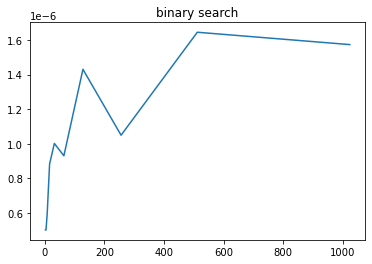

In [10]:
plt.plot(num, mean_list_binary_search)
plt.title('binary search')
plt.show()

### $2$分探索法を使用した場合を使用しない場合

In [11]:
def search(df, target):
    start = time.time()
    for i in range(len(df)):
        if df[i][0] == target:
            return i, time.time()-start
    return None, time.time()-start

In [12]:
all_time_list = []

num  = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
count = 10

for i in range(len(num)):
    time_list = []
    figure1 = 0
    figure2 = 1
    df = pd.DataFrame()

    for j in range(num[i]):
        df.loc[j, 0]  = figure2
        figure1, figure2 = figure2, figure1 + figure2

    df = df.values.tolist()
    for _ in range(count):
        
        t = search(df, random.choice(df)[0])[1]
        time_list.append(t)
    all_time_list.append(time_list)

In [13]:
mean_list = []
for i in range(len(all_time_list)):
    mean = statistics.mean(all_time_list[i])
    mean_list.append(mean)

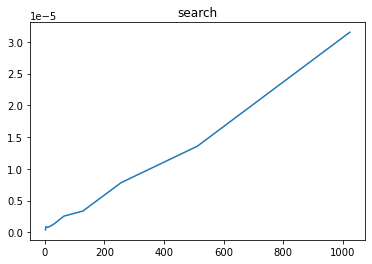

In [14]:
plt.plot(num, mean_list)
plt.title('search')
plt.show()

### $2$分探索を使用した場合としない場合の時間の比較

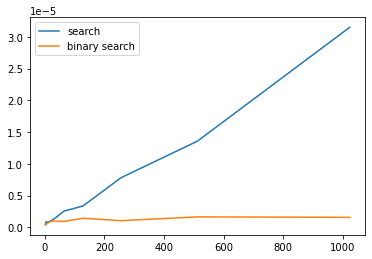

In [15]:
plt.plot(num, mean_list, label = 'search')
plt.plot(num, mean_list_binary_search, label = 'binary search')
plt.legend()
plt.show()

わかりずらいので、縦軸を対数にする

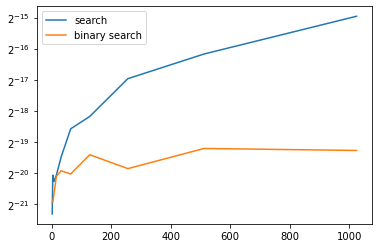

In [16]:
plt.plot(num, mean_list, label = 'search')
plt.plot(num, mean_list_binary_search, label = 'binary search')
plt.yscale("log",base=2)
plt.legend()
plt.show()